Mini-Project for Day 1: Sequences & File Handling

Use one of your existing FASTA files and do the following:

1. Load sequences with Biopython (SeqIO)


2. Clean sequences (use your clean() function)


3. Compute GC content (compare calculate_gc() vs Biopython’s GC())


4. Transcribe & translate sequences (compare your functions vs Biopython)


5. Find longest ORF using your function


6. Store results in a Pandas DataFrame


7. Plot GC content distribution using Matplotlib


ID: Human_sequence
RNA: AUGCUAGCUAGCUAACGAUGCUAGCUAGCUGAC
Protein: MLAS*RC*LAD

ID: Mouse_sequence
RNA: UUGCGCGGAUCGUAGCUAGCUAGCUAGCUAAUGCUA
Protein: LRGS*LAS*LML

ID: Plant_sequence
RNA: GCUAGCUAGCAUCGAUCGUAUAGCUAGCUAGC
Protein: AS*HRSYS*L

        Organisms  GC Content(%)
0  Human_sequence          48.48
1  Mouse_sequence          50.00
2  Plant_sequence          50.00


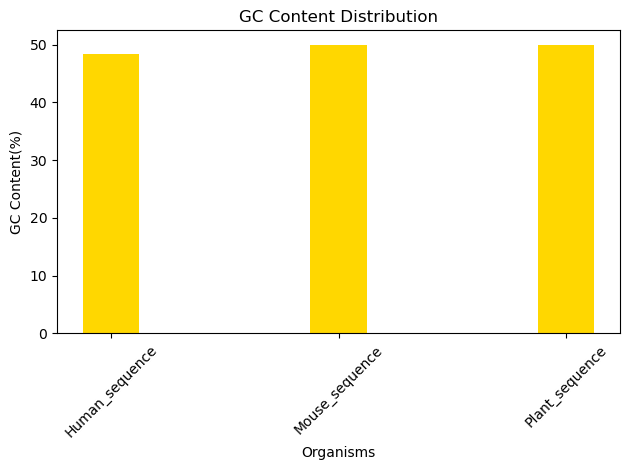

In [31]:

        SeqIO.write (new_records, file, "fasta")

    # print output
    print(f"ID: {seqRecord.id}\nRNA: {rna}\nProtein: {protein}\n")

    # collect results for pandas
    results_for_pandas.append({
        'Organisms': seqRecord.id,
        'GC Content(%)': round(gc_content,2)
    })

# pfrom my_project import clean

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

results_for_pandas= []
new_records= []
for seqRecord in SeqIO.parse("practice3.fasta", "fasta"):
    clean_sequence= clean(str(seqRecord.seq))
    
    gc_content= gc_fraction(clean_sequence) * 100
    
    rna= (Seq(clean_sequence).transcribe())
    
    protein= (Seq(clean_sequence[:len(clean_sequence)- (len(clean_sequence)%3)]).translate())


# Saving my fasta cleaned sequences
    new_record= SeqRecord(Seq(clean_sequence), id= seqRecord.id, description= "")
    new_records.append(new_record)
    with open("cleaned_fasta", "w") as file:andas dataframe
import pandas as pd
df= pd.DataFrame(results_for_pandas)
print(df)


# plotting
import matplotlib.pyplot as plt

x= df['Organisms']
y= df['GC Content(%)']

plt.bar(x,y, width= 0.25, color= "gold")
plt.title("GC Content Distribution")
plt.xlabel("Organisms")
plt.xticks(x, rotation= 45)
plt.ylabel("GC Content(%)")
plt.tight_layout()
plt.show()